<a href="https://colab.research.google.com/github/kameshcodes/tensorflow-codes/blob/main/7_tensorflow_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\textbf{Data Augmenation}$$

---
---

# Raw Training

---

## 1. Download Data

In [1]:
!pip install -q kaggle

In [2]:
!kaggle datasets download -d kameshdubeyuuyu/cats-vs-dogs-filtered
!unzip -q cats-vs-dogs-filtered.zip -d cats-vs-dogs-filtered
!rm -rf cats-vs-dogs-filtered.zip cats-vs-dogs-filtered/vectorize.py

Dataset URL: https://www.kaggle.com/datasets/kameshdubeyuuyu/cats-vs-dogs-filtered
License(s): unknown
 98% 64.0M/65.3M [00:01<00:00, 70.4MB/s]
100% 65.3M/65.3M [00:01<00:00, 65.2MB/s]


## 2. Import Libraries

In [3]:
import os
import time
import random
import numpy as np
from io import BytesIO

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

from ipywidgets import widgets
from IPython.display import display

In [4]:
BASE_DIR = './cats-vs-dogs-filtered'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VALIDATION_DIR = os.path.join(BASE_DIR, 'validation')

print(f"Train directory: {TRAIN_DIR}")
print(f"Validation directory: {VALIDATION_DIR}")

train_dogs_dir = os.path.join(TRAIN_DIR, 'dogs')
train_cats_dir = os.path.join(TRAIN_DIR, 'cats')
validation_dogs_dir = os.path.join(VALIDATION_DIR, 'dogs')
validation_cats_dir = os.path.join(VALIDATION_DIR, 'cats')

print(f"\nTrain cats directory: {train_cats_dir}")
print(f"Train dogs directory: {train_dogs_dir}")

Train directory: ./cats-vs-dogs-filtered/train
Validation directory: ./cats-vs-dogs-filtered/validation

Train cats directory: ./cats-vs-dogs-filtered/train/cats
Train dogs directory: ./cats-vs-dogs-filtered/train/dogs


In [5]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

print(f'{len(train_cats_fnames)} cats images.')
print(f'{len(train_dogs_fnames)} dogs images.')

1000 cats images.
1000 dogs images.


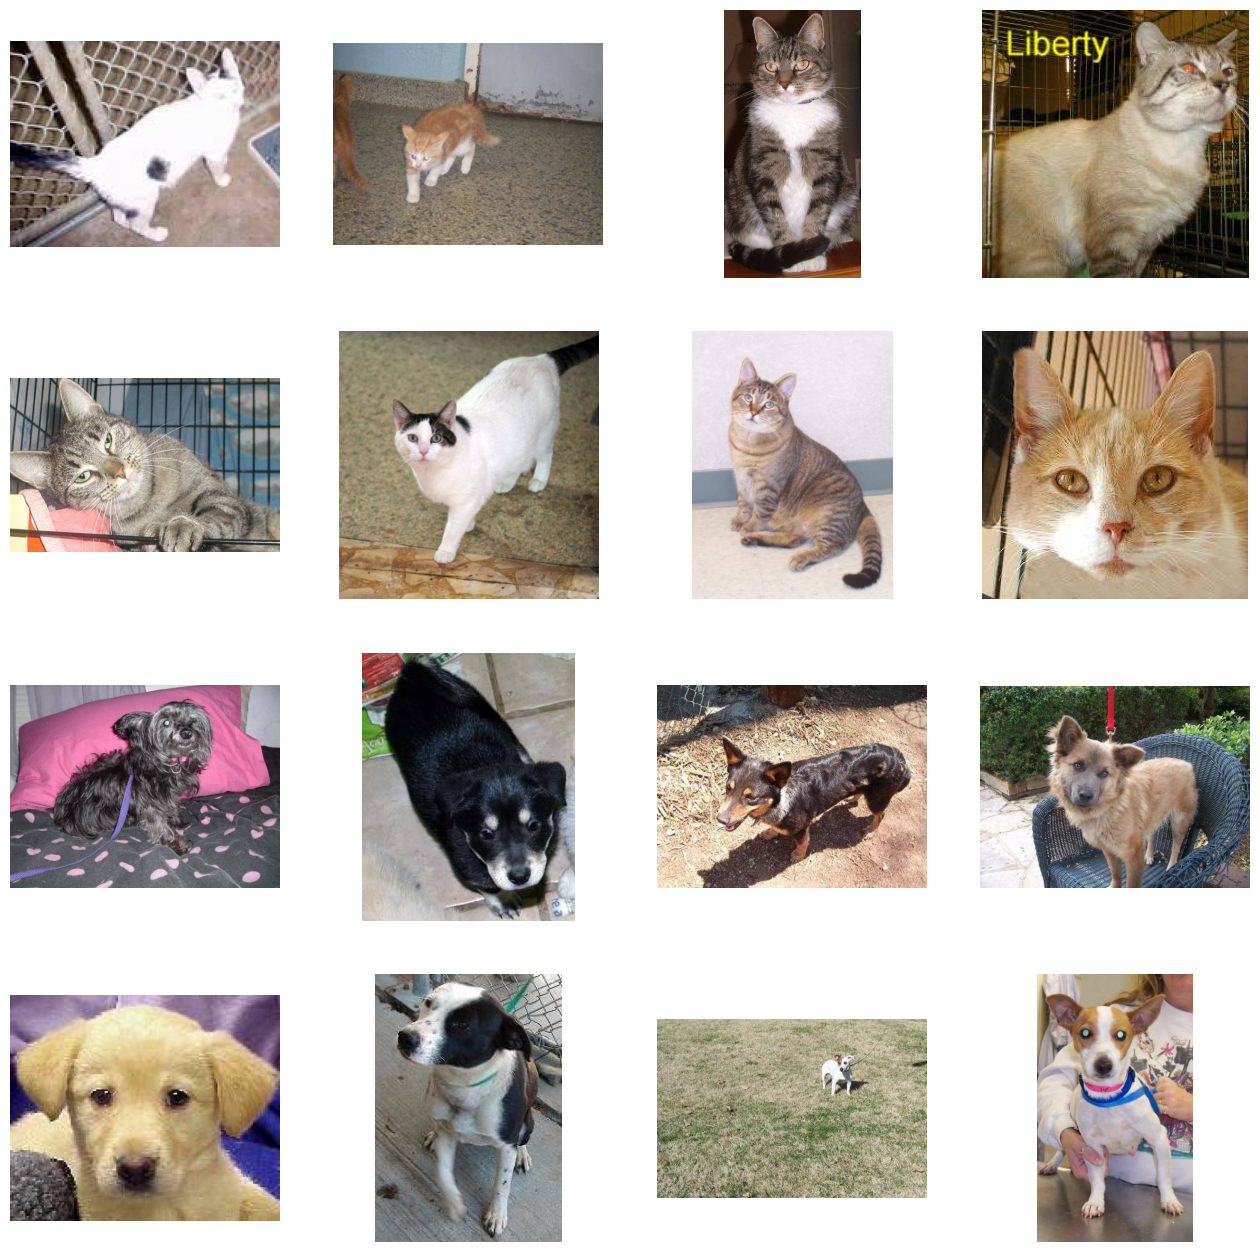

In [6]:
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

next_cats_pix = [os.path.join(train_cats_dir, fname) for fname in random.sample(train_cats_fnames, k=8)]
next_dogs_pix = [os.path.join(train_dogs_dir, fname) for fname in random.sample(train_dogs_fnames, k=8)]


for i, img_path in enumerate(next_cats_pix+next_dogs_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## 3. CNN MODEL FROM SCRATCH with recommended intializers

In [7]:
def create_model():
  model = tf.keras.models.Sequential(
      [
          tf.keras.layers.Input(shape=(300, 300, 3)),
          #rescaling layer
          tf.keras.layers.Rescaling(1/255.0),
          #first conv layer
          tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal'),
          tf.keras.layers.MaxPooling2D(2, 2),
          #second conv layer
          tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'),
          tf.keras.layers.MaxPooling2D(2, 2),
          #third conv layer
          tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'),
          tf.keras.layers.MaxPooling2D(2, 2),
          #fourth conv layer
          tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'),
          tf.keras.layers.MaxPooling2D(2, 2),
          #flattening layer
          tf.keras.layers.Flatten(),
          #fully connected layer
          tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
          #output layer
          tf.keras.layers.Dense(1, activation='sigmoid')
      ]
  )
  return model

In [8]:
model = create_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 298, 298, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      16,777,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,019,073 (64.92 MB)

 Trainable params: 17,019,073 (64.92 MB)

 Non-trainable params: 0 (0.00 B)

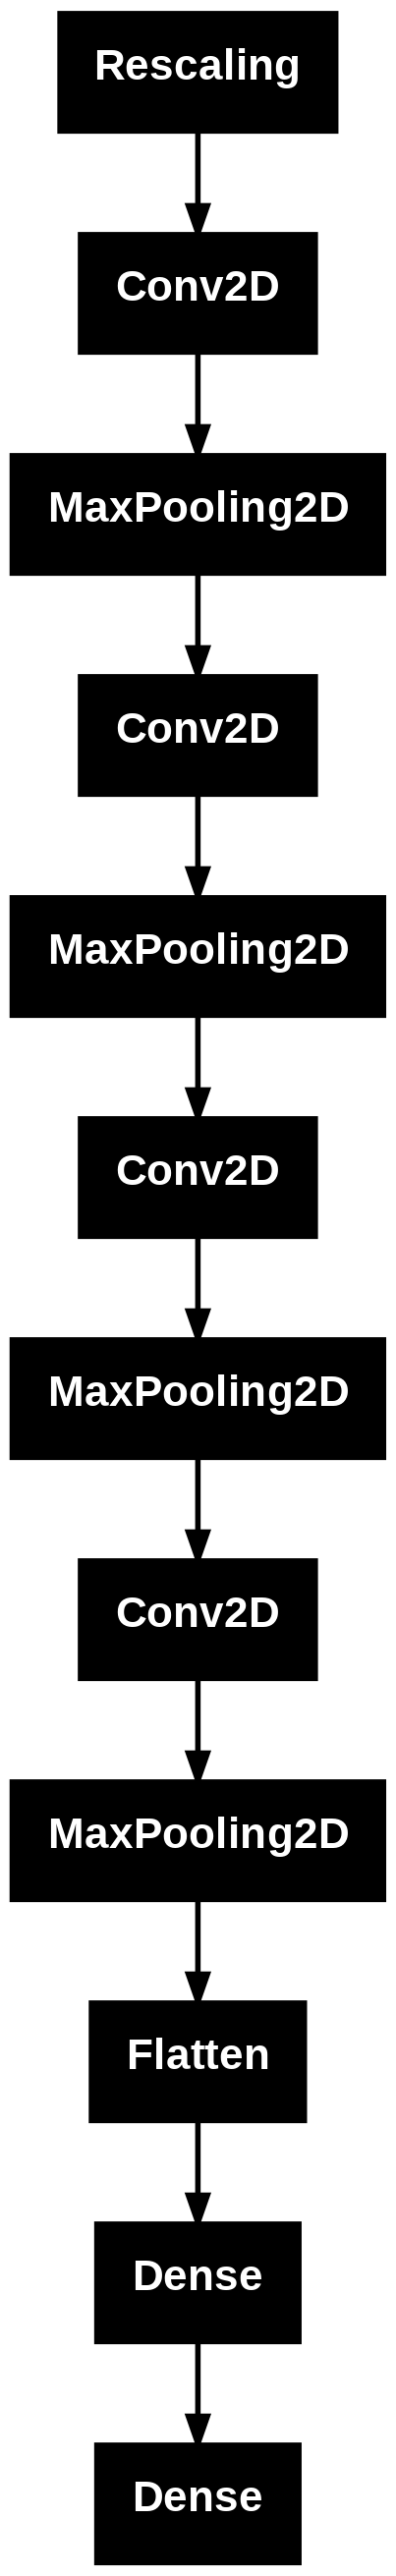

In [9]:
tf.keras.utils.plot_model(model)

In [10]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 3. Data Preprocessing pipeline


 - use the `image_from_dataset_directory` utility to read pictures in the source folders named ***cats-vs-dogs-filtered***
 - Convert the images into tensors
 - combine with the labels and form a `tf.data.Dataset`

In [47]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(300, 300),
    batch_size=32,
    label_mode='binary'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DIR,
    image_size=(300, 300),
    batch_size=32,
    label_mode='binary'
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [12]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = 1000

train_dataset_final = (
    train_dataset
    .cache()
    .shuffle(SHUFFLE_BUFFER_SIZE)
    .prefetch(PREFETCH_BUFFER_SIZE)
)

validation_dataset_final = (
    validation_dataset
    .cache()
    .prefetch(PREFETCH_BUFFER_SIZE)
)

## 4. Model Training


In [13]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs and logs.get('accuracy', 0) >= 0.99:  # Handle cases where accuracy is missing
        print("\nReached 99% accuracy so cancelling training!")
        self.model.stop_training = True

In [14]:
history = model.fit(
    train_dataset_final,
    epochs=100,
    validation_data=validation_dataset_final,
    steps_per_epoch=tf.data.experimental.cardinality(train_dataset_final).numpy(),
    callbacks=[EarlyStoppingCallback()]
)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 246ms/step - accuracy: 0.5124 - loss: 13.8093 - val_accuracy: 0.5000 - val_loss: 2.6910
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.5121 - loss: 1.0037 - val_accuracy: 0.5000 - val_loss: 0.9348
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.5319 - loss: 0.7363 - val_accuracy: 0.5610 - val_loss: 0.6860
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.5763 - loss: 0.6943 - val_accuracy: 0.5930 - val_loss: 0.6562
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.6713 - loss: 0.6269 - val_accuracy: 0.6900 - val_loss: 0.6058
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.7180 - loss: 0.6040 - val_accuracy: 0.7090 - val_loss: 0.5877
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.7666 - loss: 0.4994 - val_accuracy: 0.7050 - val_loss: 0.6075
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.8114 - loss: 0.3923 - val_accu

<Figure size 640x480 with 0 Axes>

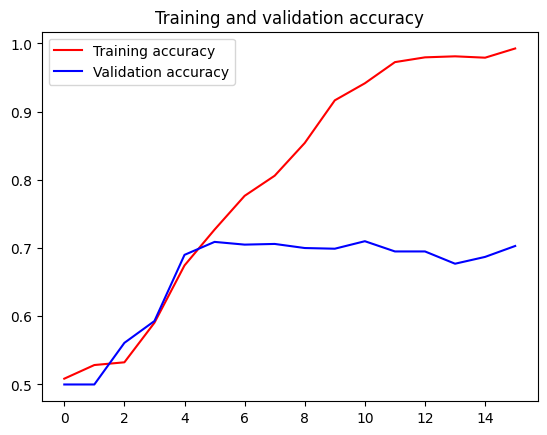

<Figure size 640x480 with 0 Axes>

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

## 5. Predication Widget

In [16]:
import time
import numpy as np
import tensorflow as tf
import ipywidgets as widgets
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

# Create the widget and display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction, displaying the image, and printing the output."""
    start_time = time.time()

    # Load and preprocess the image
    image = tf.keras.utils.load_img(file, target_size=(300, 300))
    image_array = tf.keras.utils.img_to_array(image)
    image_expanded = np.expand_dims(image_array, axis=0)

    # Get prediction
    prediction = model.predict(image_expanded, verbose=0)[0][0]
    end_time = time.time()
    time_taken = end_time - start_time

    # Determine the prediction label
    label = f"cat" if prediction > 0.5 else "dog"

    # Display the image with the prediction
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.title(f"classified -> {label} by model.")
    plt.axis('off')
    plt.show()


def on_upload_change(change):
    """ A function for getting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    uploaded_files = change.new
    for filename, file_info in uploaded_files.items():
        file_content = BytesIO(file_info['content'])
        file_predict(filename, file_content, out)

# Observe the uploader widget for changes
uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()

## 6. Visualizing Intermediate Convolution Layers

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 300, 300, 3))
  warnings.warn(msg)
<ipython-input-17-f9072c3d91f5>:39: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
<ipython-input-17-f9072c3d91f5>:42: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


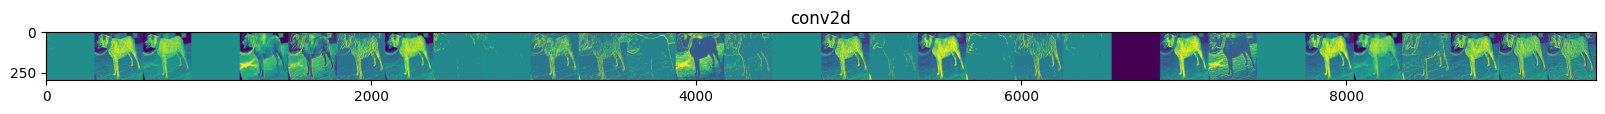

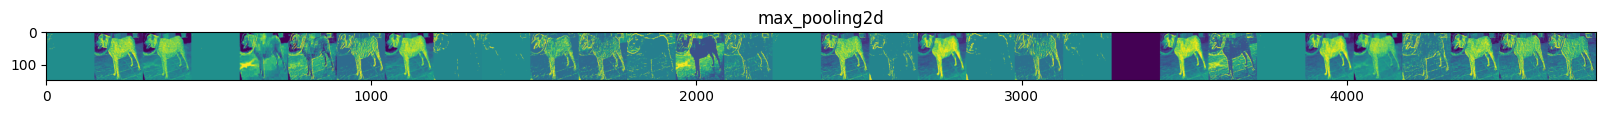

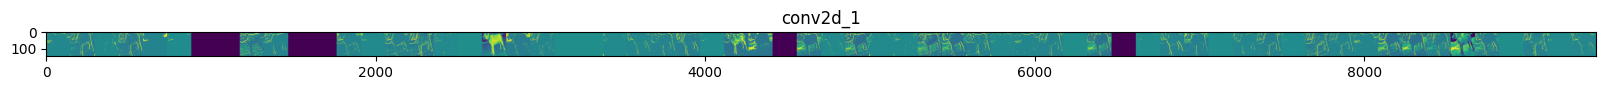

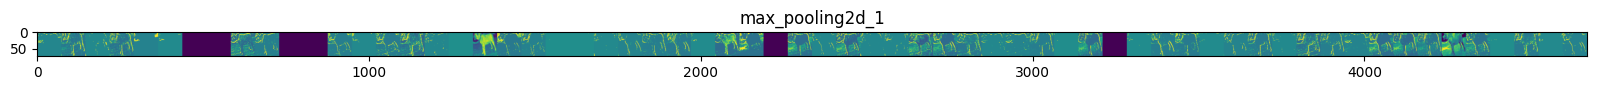

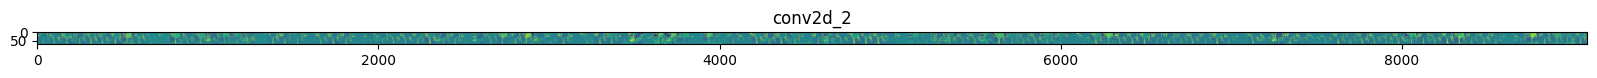

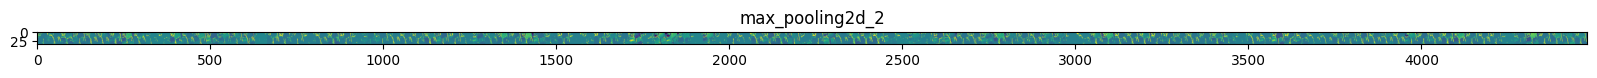

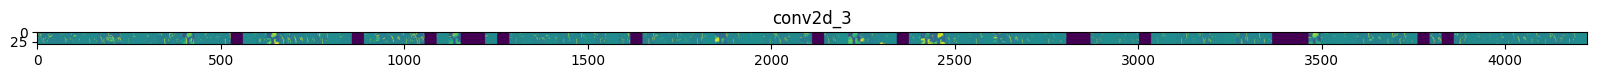

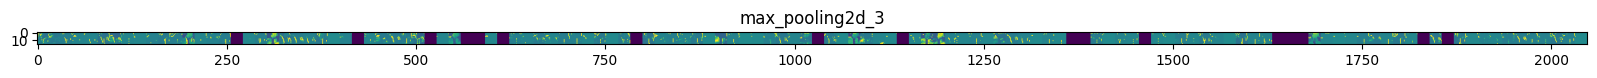

In [17]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_fnames]
human_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_fnames]
img_path = random.choice(horse_img_files + human_img_files)

img = tf.keras.utils.load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = tf.keras.utils.img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)


# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x, verbose=False)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:

        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map

        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]

        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x

        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Augmented Training

---

## 1. Augmentation:  [Docs](https://keras.io/api/layers/preprocessing_layers/image_augmentation/)

In [18]:
FILL_MODE = 'nearest'

data_augmentation = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(300, 300, 3)),
        tf.keras.layers.RandomFlip('horizontal'),
        tf.keras.layers.RandomRotation(0.2, fill_mode = FILL_MODE),
        tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode = FILL_MODE),
        tf.keras.layers.RandomZoom(0.2, fill_mode = FILL_MODE)
    ]
)

In [19]:
model_without_aug = create_model()

model_with_aug = tf.keras.models.Sequential([
        data_augmentation,
        model_without_aug
    ])

In [20]:
model_with_aug.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
                       loss = 'binary_crossentropy',
                       metrics=['accuracy'])

Because you now have virtually more data, it will also take the model more time to learn the relevant features.

## 2. Training After Augmentation

In [21]:
class EarlyStoppingCallback2(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs and logs.get('val_accuracy', 0) >= 0.8:  # Handle cases where accuracy is missing
        print("\nReached 99% accuracy so cancelling training!")
        self.model.stop_training = True

In [22]:
history_with_aug = model_with_aug.fit(
    train_dataset_final,
    epochs=1000,
    validation_data=validation_dataset_final,
    callbacks=[EarlyStoppingCallback2()]
)

Epoch 1/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - accuracy: 0.5151 - loss: 1.4841 - val_accuracy: 0.5020 - val_loss: 0.7063
Epoch 2/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.5688 - loss: 0.6892 - val_accuracy: 0.5120 - val_loss: 0.6922
Epoch 3/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.5665 - loss: 0.6780 - val_accuracy: 0.6490 - val_loss: 0.6319
Epoch 4/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.6161 - loss: 0.6534 - val_accuracy: 0.6380 - val_loss: 0.6247
Epoch 5/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.6204 - loss: 0.6526 - val_accuracy: 0.6640 - val_loss: 0.6191
Epoch 6/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.6272 - loss: 0.6324 - val_accuracy: 0.6670 - val_loss: 0.6137
Epoch 7/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.6220 - loss: 0.6314 - val_accuracy: 0.6820 - val_loss: 0.5884
Epoch 8/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.6389 - loss: 0.6266 - val_ac

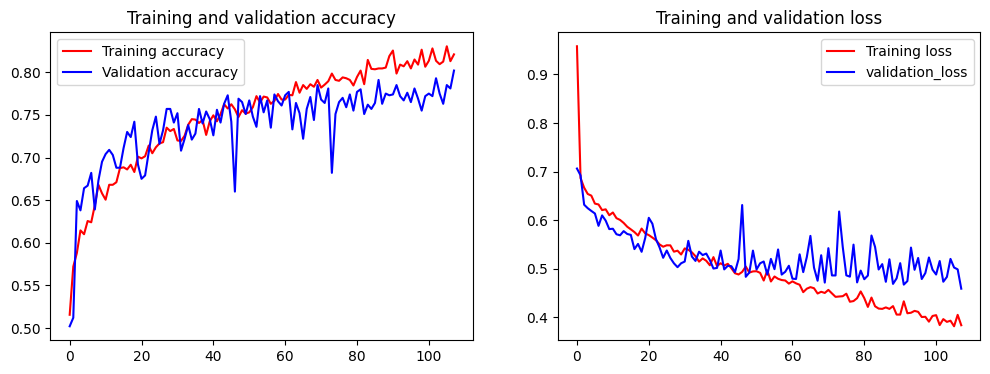

In [23]:
acc = history_with_aug.history['accuracy']
val_acc = history_with_aug.history['val_accuracy']
loss = history_with_aug.history['loss']
val_loss = history_with_aug.history['val_loss']

epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize = (12,4))
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[1].plot(epochs, loss, 'r', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='validation_loss')
ax[0].set_title('Training and validation accuracy')
ax[1].set_title('Training and validation loss')
ax[0].legend(loc=0)
ax[1].legend(loc=0)
plt.show()

# 3. Visualize Augmentation

In [58]:
for sample_batch, label in train_dataset.take(1):
    pass

print(f'images per batch: {len(sample_batch)}')

images per batch: 32


In [67]:
img_index = 2
sample_image = sample_batch[img_index]

image_preview = []
sample_image_pil = tf.keras.utils.array_to_img(sample_image)
image_preview.append(sample_image_pil)

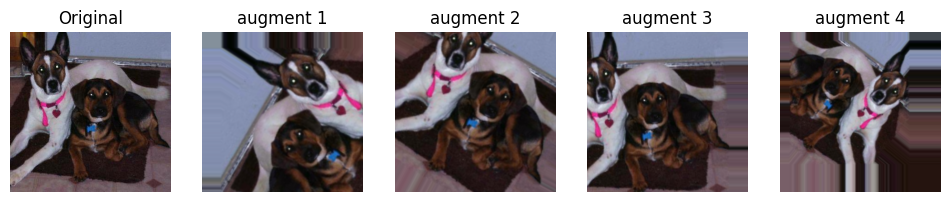

In [68]:
NUM_AUG = 4

for i in range(NUM_AUG):
  sample_image_aug = data_augmentation(tf.expand_dims(sample_image, axis=0))
  sample_image_aug_pil = tf.keras.utils.array_to_img(tf.squeeze(sample_image_aug))
  image_preview.append(sample_image_aug_pil)

fig, ax = plt.subplots(1, NUM_AUG+1, figsize = (12, 12))

# preview image

for index, ax in enumerate(ax):
  ax.imshow(image_preview[index])
  ax.set_axis_off()

  if index == 0:
    ax.set_title("Original")
  else:
    ax.set_title(f'augment {index}')